In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from text_model.text_embedding import compute_sklearn_features

In [2]:
#for i in range(30):
    #index = np.random.randint(df_all.shape[0])
    #print(df_all['search_query'][index])
    #print(df_all['text'][index])
    #print('\n')

In [3]:
X_sklearn, y_sklearn = compute_sklearn_features()

Finished loading word embedding weights.
Finished loading dataframes.
Computing sklearn features:
Finished


In [4]:
X_sklearn.shape

(295424, 50)

In [10]:
_RANDOM_SEED = 0
X_sklearn_train, X_sklearn_valid, y_sklearn_train, y_sklearn_valid = train_test_split(X_sklearn, y_sklearn, 
                                                                                      test_size=0.2,
                                                                                      random_state=_RANDOM_SEED)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_sklearn_train, y_sklearn_train)
print(accuracy_score(logreg.predict(X_sklearn_train), y_sklearn_train))
print(accuracy_score(logreg.predict(X_sklearn_valid), y_sklearn_valid))

0.519279509518
0.517864094102


In [14]:
forest = RandomForestClassifier(max_depth=12)
forest.fit(X_sklearn_train, y_sklearn_train)
print(accuracy_score(forest.predict(X_sklearn_train), y_sklearn_train))
print(accuracy_score(forest.predict(X_sklearn_valid), y_sklearn_valid))

0.582438784966
0.511043412034


In [1]:
from text_model.text_embedding import main_text
main_text()

Finished loading word embedding weights.
Finished loading dataframes.
Training:
Epoch: 1
0%  loss = 1.930, accuracy = 0.367, speed = 232 pps
10%  loss = 1.244, accuracy = 0.514, speed = 5403 pps
20%  loss = 1.199, accuracy = 0.533, speed = 5528 pps
30%  loss = 1.179, accuracy = 0.540, speed = 5494 pps
40%  loss = 1.163, accuracy = 0.547, speed = 5486 pps
50%  loss = 1.153, accuracy = 0.552, speed = 5464 pps
60%  loss = 1.145, accuracy = 0.555, speed = 5440 pps
70%  loss = 1.139, accuracy = 0.558, speed = 5396 pps
80%  loss = 1.132, accuracy = 0.561, speed = 5407 pps
90%  loss = 1.127, accuracy = 0.563, speed = 5415 pps
100%  loss = 1.123, accuracy = 0.566, speed = 5389 pps

Validation:
Epoch: 1
Loss = 1.078, accuracy = 0.590, speed = 5955 pps
Finished


In [ ]:
Epoch: 10
0%  loss = 1.150, accuracy = 0.555, speed = 430 pps
10%  loss = 1.061, accuracy = 0.593, speed = 5735 pps
20%  loss = 1.063, accuracy = 0.590, speed = 5972 pps
30%  loss = 1.065, accuracy = 0.589, speed = 6057 pps
40%  loss = 1.064, accuracy = 0.589, speed = 6093 pps
50%  loss = 1.064, accuracy = 0.589, speed = 6116 pps
60%  loss = 1.063, accuracy = 0.589, speed = 6122 pps
70%  loss = 1.063, accuracy = 0.589, speed = 6135 pps
80%  loss = 1.062, accuracy = 0.589, speed = 6145 pps
90%  loss = 1.063, accuracy = 0.589, speed = 6145 pps
100%  loss = 1.063, accuracy = 0.589, speed = 6150 pps

In [2]:
from datasets.download_images import download_im_with_text

search_query = 'sad'
start = 100
end = 300
download_im_with_text(search_query, start, end, dataset_dir='data', subdir='photos')

Finished loading word embedding weights.


In [1]:
from datasets.convert_images_tfrecords import convert_images_with_text

# num_valid=4000 right now
convert_images_with_text('data', num_valid=50, photos_subdir='photos', tfrecords_subdir='tfrecords')

Finished loading word embedding weights.
>> Converting image 441/441 shard 4
>> Converting image 50/50 shard 4

Finished converting the dataset!


In [1]:
from image_model.im_model import fine_tune_model_with_text

dataset_dir = 'data'
checkpoints_dir = 'image_model/pretrained_model'
train_dir = 'image_model/fine_tuned_model'
num_steps = 5
learning_rate = 1e-7
fine_tune_model_with_text(dataset_dir, checkpoints_dir, train_dir,
                          num_steps, learning_rate)

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
Instructions for updating:
Use tf.losses.get_total_loss instead.
Instructions for updating:
Use tf.losses.get_losses instead.
Instructions for updating:
Use tf.losses.get_regularization_losses instead.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global step 1: loss = 2.5072 (23.67 sec/step)
INFO:tensorflow:global step 2: loss = 2.4847 (14.01 sec/step)
INFO:tensorflow:global step 3: loss = 2.5421 (13.79 sec/step)
INFO:tensorflow:global_step/sec: 0.0503884
INFO:tensorflow:global step 4: loss = 2.5466 (20.87 sec/step)
INFO:tensorflow:global step 5: loss = 2.7608 (15.83 sec/step)
INFO:tensorflow:Stopping Training.
INFO:tensorflow:Finished training! Saving model to disk.
Finished training. Last batch loss 2.761


In [1]:
from image_model.im_model import evaluate_model_2

checkpoint_dir = 'image_model/fine_tuned_model'
log_dir = 'image_model/model_eval'
mode = 'train'
num_evals = 5
        
evaluate_model_2(checkpoint_dir, log_dir, mode, num_evals)

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
INFO:tensorflow:Waiting for new checkpoint at image_model/fine_tuned_model
INFO:tensorflow:Found new checkpoint at image_model/fine_tuned_model/model.ckpt-5
INFO:tensorflow:Starting evaluation at 2017-09-02-11:58:26
INFO:tensorflow:Evaluation [1/5]
INFO:tensorflow:Evaluation [2/5]
INFO:tensorflow:Evaluation [3/5]
INFO:tensorflow:Evaluation [4/5]
INFO:tensorflow:Evaluation [5/5]
INFO:tensorflow:Finished evaluation at 2017-09-02-11:58:49
INFO:tensorflow:Waiting for new checkpoint at image_model/fine_tuned_model


KeyboardInterrupt: 

In [ ]:
#https://stackoverflow.com/questions/39732460/how-to-use-evaluation-loop-with-train-loop-in-tf-slim

In [2]:
from image_model.im_model import evaluate_model_2

checkpoint_dir = 'image_model/fine_tuned_model'
log_dir = 'image_model/model_eval'
mode = 'validation'
num_evals = 5
        
evaluate_model_2(checkpoint_dir, log_dir, mode, num_evals)

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
INFO:tensorflow:Waiting for new checkpoint at image_model/fine_tuned_model
INFO:tensorflow:Found new checkpoint at image_model/fine_tuned_model/model.ckpt-5
INFO:tensorflow:Starting evaluation at 2017-09-02-11:59:33
INFO:tensorflow:Evaluation [1/5]
INFO:tensorflow:Evaluation [2/5]
INFO:tensorflow:Evaluation [3/5]
INFO:tensorflow:Evaluation [4/5]
INFO:tensorflow:Evaluation [5/5]
INFO:tensorflow:Finished evaluation at 2017-09-02-11:59:55
INFO:tensorflow:Waiting for new checkpoint at image_model/fine_tuned_model


KeyboardInterrupt: 

# Image and text model

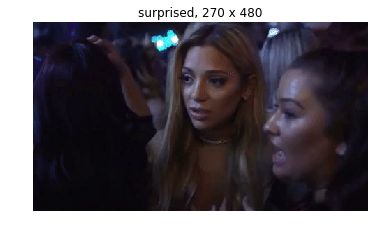

[400000   1816     10     50  18267  71497 400000    102   3553    203
    102  56563 400000   2926 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 40000

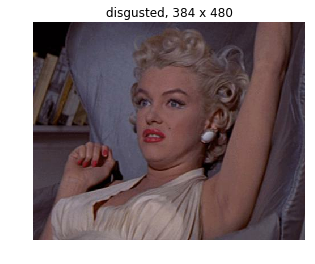

[    50  42475  71497  19834  11956  10278   7650  66902  22639  39204
   1970  18747     66   1957 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 40000

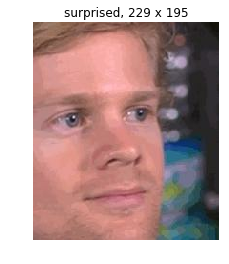

[   738    260    192   5450    662   3553    359     79     18    934
      4    192    927      5   3380    285     63    117 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 400000 400000 400000 400000 400000 400000 400000 400000 400000 400000
 40000

In [1]:
import tensorflow as tf
from tensorflow.contrib import slim
import matplotlib.pyplot as plt
from datasets.convert_to_dataset import get_split_with_text
%matplotlib inline

with tf.Graph().as_default(): 
    dataset_dir = 'data'
    dataset = get_split_with_text('train', dataset_dir)
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1, shuffle=False)
    image, text, label = data_provider.get(['image', 'text', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(3):
                np_image, np_text, np_label = sess.run([image, text, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()
                print(np_text)

In [1]:
from image_text_model.im_text_model import train_deep_sentiment

dataset_dir = 'data'
checkpoints_dir = 'image_model/pretrained_model'
train_dir = 'image_text_model/deep_sentiment_model'
num_steps = 20
initial_lr = 1e-3
train_deep_sentiment(dataset_dir, checkpoints_dir, train_dir,
                     num_steps, initial_lr)

Finished loading word embedding weights.
Instructions for updating:
Use tf.losses.softmax_cross_entropy instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
Instructions for updating:
Use tf.losses.get_total_loss instead.
Instructions for updating:
Use tf.losses.get_losses instead.
Instructions for updating:
Use tf.losses.get_regularization_losses instead.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Queues.
New learning rate: 0.001INFO:tensorflow:global_step/sec: 0

INFO:tensorflow:global step 1: loss = 2.5797 (24.00 sec/step)
[ 0.35339224  0.44726145 -0.37729916  0.2614454   0.20725159  0.10748732]
INFO:tensorflow:global step 2: loss = 1.7651 (14.22 sec/step)
[ 0.35239097  0.44630712 -0.37645373  0.26183143  0.20630422  0.10655889]
INFO:tensorflow:global step 3: loss = 1.5624 (13.49 sec/step)
[ 0.35164225  0.44552144 -0.37591067  0.26235554  0.2055086   0.1067391 ]
INFO:tensorflow:glo

In [1]:
from image_text_model.im_text_model import evaluate_deep_sentiment

checkpoint_dir = 'image_text_model/deep_sentiment_model'
log_dir = 'image_text_model/model_eval'
num_evals = 10
evaluate_deep_sentiment(checkpoint_dir, log_dir, 'train', num_evals)

Finished loading word embedding weights.
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
INFO:tensorflow:Waiting for new checkpoint at image_text_model/deep_sentiment_model
INFO:tensorflow:Found new checkpoint at image_text_model/deep_sentiment_model/model.ckpt-20
INFO:tensorflow:Starting evaluation at 2017-09-05-13:05:16
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-09-05-13:05:23
INFO:tensorflow:Waiting for new checkpoint at image_text_model/deep_sentiment_model


KeyboardInterrupt: 

Finished loading word embedding weights.


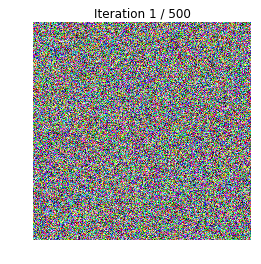

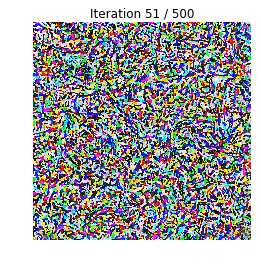

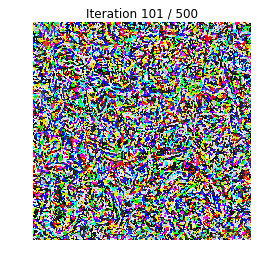

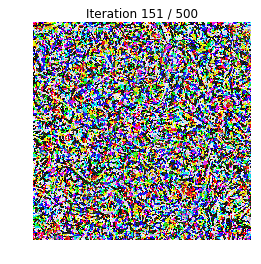

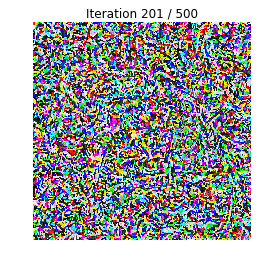

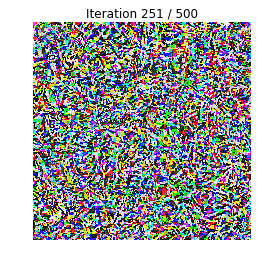

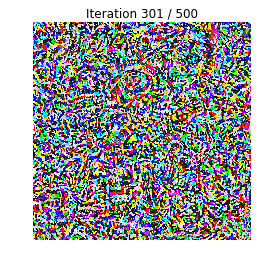

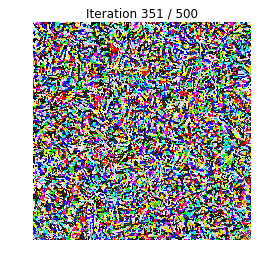

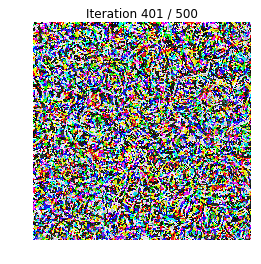

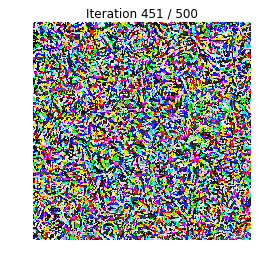

In [1]:
from image_text_model.im_text_model import class_visualisation
%matplotlib inline

label = 0
learning_rate = 50
checkpoint_dir = 'image_text_model/deep_sentiment_model'
log_dir = 'image_text_model/class_vis'
class_visualisation(label, learning_rate, checkpoint_dir, log_dir)

Finished loading word embedding weights.


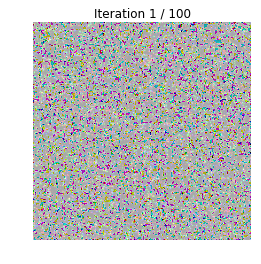

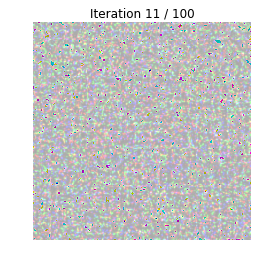

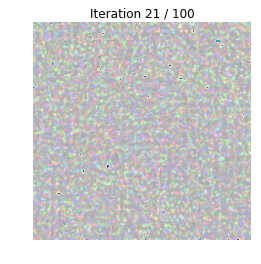

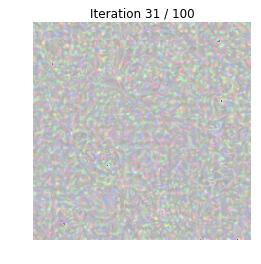

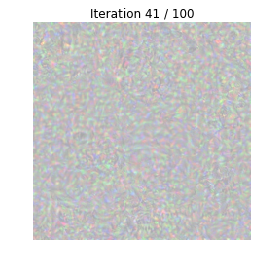

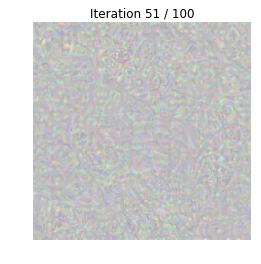

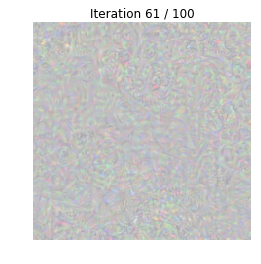

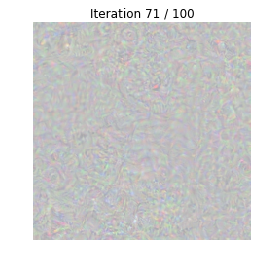

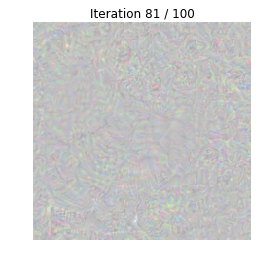

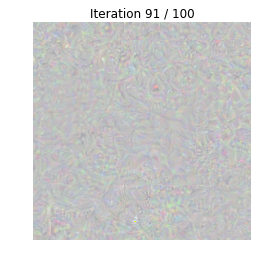

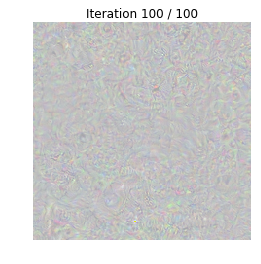

In [2]:
from image_text_model.im_text_model import class_visualisation
%matplotlib inline

# with trained model
label = 3
learning_rate = 5
checkpoint_dir = 'image_text_model/deep_sentiment_model'
log_dir = 'image_text_model/class_vis'
class_visualisation(label, learning_rate, checkpoint_dir, log_dir)

Finished loading word embedding weights.


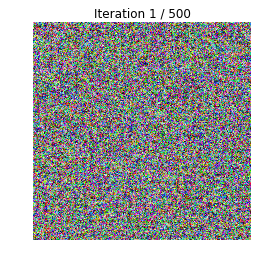

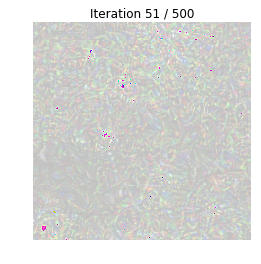

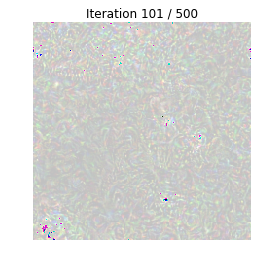

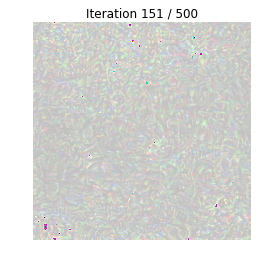

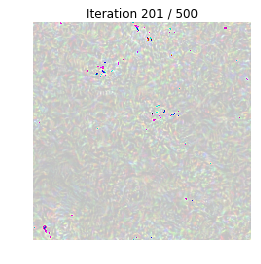

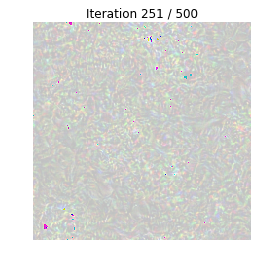

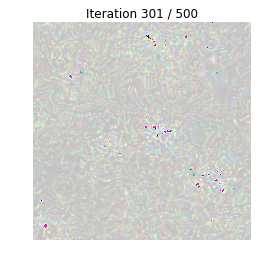

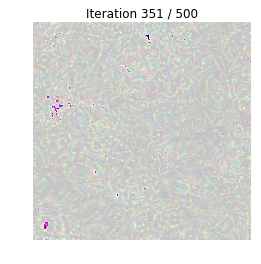

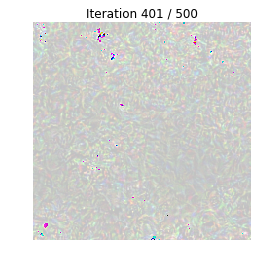

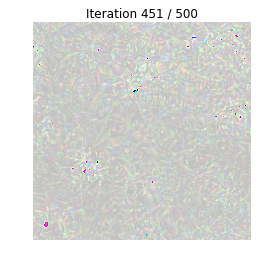

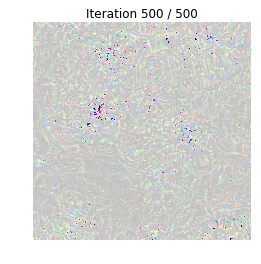

In [1]:
from image_text_model.im_text_model import class_visualisation
%matplotlib inline

# with trained model
label = 3
learning_rate = 15
checkpoint_dir = 'image_text_model/deep_sentiment_model'
log_dir = 'image_text_model/class_vis'
class_visualisation(label, learning_rate, checkpoint_dir, log_dir)

In [1]:
from text_model.text_preprocessing import _load_embedding_weights_glove

vocabulary, embedding = _load_embedding_weights_glove('text_model', 'embedding_weights', 'glove.6B.50d.txt')

Finished loading word embedding weights.


In [1]:
from image_text_model.im_text_model import word_most_relevant
%matplotlib inline

# with trained model
label = 2
checkpoint_dir = 'image_text_model/deep_sentiment_model'
grads, vocabulary, word_to_id = word_most_relevant(label, checkpoint_dir)

Finished loading word embedding weights.


KeyboardInterrupt: 

In [8]:
top_grads = sorted(zip(grads, np.arange(len(vocabulary), dtype=int)), reverse=False)[:20]

array([    0.        ,     0.        ,     0.        , ...,     0.        ,
           0.        ,  1595.57836914], dtype=float32)

In [5]:
len(vocabulary)

400000

# RNN model

In [1]:
from text_model.text_embedding import main_text
main_text()

Finished loading word embedding weights.
Finished loading dataframes.
Training:
Epoch: 1
0%  loss = 2.064, accuracy = 0.031, speed = 214 pps
10%  loss = 1.238, accuracy = 0.510, speed = 4473 pps
20%  loss = 1.196, accuracy = 0.533, speed = 5034 pps
30%  loss = 1.175, accuracy = 0.540, speed = 5246 pps
40%  loss = 1.163, accuracy = 0.546, speed = 5358 pps
50%  loss = 1.152, accuracy = 0.552, speed = 5421 pps
60%  loss = 1.145, accuracy = 0.555, speed = 5386 pps
70%  loss = 1.137, accuracy = 0.558, speed = 5419 pps
80%  loss = 1.131, accuracy = 0.561, speed = 5413 pps
90%  loss = 1.127, accuracy = 0.563, speed = 5405 pps
100%  loss = 1.123, accuracy = 0.565, speed = 5377 pps
Epoch: 2
0%  loss = 1.170, accuracy = 0.516, speed = 183 pps
10%  loss = 1.077, accuracy = 0.587, speed = 4244 pps
20%  loss = 1.070, accuracy = 0.587, speed = 4762 pps
30%  loss = 1.067, accuracy = 0.590, speed = 5027 pps
40%  loss = 1.067, accuracy = 0.590, speed = 5170 pps
50%  loss = 1.068, accuracy = 0.589, spee

In [29]:
import tensorflow as tf

tf.reset_default_graph()

vocab_size = 10000
state_size = 64
batch_size = 256

# Placeholders
x = tf.placeholder(tf.int32, [batch_size, 10]) # [batch_size, num_steps]
seqlen = tf.placeholder(tf.int32, [batch_size])
y = tf.placeholder(tf.int32, [batch_size])
keep_prob = tf.constant(1.0)

# Embedding layer
embeddings = tf.get_variable('embedding_matrix', [vocab_size, state_size])
rnn_inputs = tf.nn.embedding_lookup(embeddings, x)

# RNN
cell = tf.contrib.rnn.BasicLSTMCell(state_size)
rnn_outputs, final_state = tf.nn.dynamic_rnn(cell, rnn_inputs, sequence_length=seqlen, dtype=tf.float32)


In [30]:
rnn_outputs

<tf.Tensor 'rnn/transpose:0' shape=(256, 10, 125) dtype=float32>

In [25]:
tf.stack([tf.range(batch_size), seqlen - 1], axis=1)

<tf.Tensor 'stack_6:0' shape=(256, 2) dtype=int32>

In [12]:
tf.gather_nd(rnn_outputs, tf.stack([tf.range(batch_size), seqlen - 1], axis=1))

<tf.Tensor 'GatherNd:0' shape=(256, 64) dtype=float32>

In [1]:
from text_model.text_embedding import main_text_rnn
main_text_rnn()

Finished loading word embedding weights.
Finished loading dataframes.
Training:
Epoch: 1
0%  loss = 1.861, accuracy = 0.047, speed = 179 pps
10%  loss = 1.294, accuracy = 0.466, speed = 205 pps
20%  loss = 1.229, accuracy = 0.504, speed = 206 pps
30%  loss = 1.189, accuracy = 0.527, speed = 205 pps
40%  loss = 1.161, accuracy = 0.541, speed = 205 pps
50%  loss = 1.138, accuracy = 0.552, speed = 206 pps
60%  loss = 1.119, accuracy = 0.561, speed = 206 pps
70%  loss = 1.103, accuracy = 0.569, speed = 206 pps
80%  loss = 1.091, accuracy = 0.575, speed = 206 pps
90%  loss = 1.080, accuracy = 0.580, speed = 206 pps
100%  loss = 1.071, accuracy = 0.584, speed = 206 pps
Epoch: 2
0%  loss = 0.867, accuracy = 0.641, speed = 185 pps
10%  loss = 0.962, accuracy = 0.630, speed = 203 pps
20%  loss = 0.966, accuracy = 0.629, speed = 205 pps
30%  loss = 0.965, accuracy = 0.631, speed = 204 pps
40%  loss = 0.962, accuracy = 0.631, speed = 204 pps
50%  loss = 0.959, accuracy = 0.633, speed = 204 pps
60

In [5]:
# with proper seq len
from text_model.text_embedding import main_text_rnn
main_text_rnn()

Finished loading word embedding weights.
Finished loading dataframes.
Training:
Epoch: 1
0%  loss = 1.900, accuracy = 0.055, speed = 164 pps
10%  loss = 1.276, accuracy = 0.483, speed = 197 pps
20%  loss = 1.222, accuracy = 0.514, speed = 192 pps
30%  loss = 1.176, accuracy = 0.537, speed = 194 pps
40%  loss = 1.149, accuracy = 0.550, speed = 195 pps
50%  loss = 1.127, accuracy = 0.560, speed = 196 pps
60%  loss = 1.108, accuracy = 0.569, speed = 193 pps
70%  loss = 1.092, accuracy = 0.577, speed = 192 pps
80%  loss = 1.079, accuracy = 0.582, speed = 191 pps
90%  loss = 1.068, accuracy = 0.587, speed = 192 pps
100%  loss = 1.059, accuracy = 0.591, speed = 193 pps
Epoch: 2
0%  loss = 1.029, accuracy = 0.594, speed = 177 pps
10%  loss = 0.946, accuracy = 0.641, speed = 205 pps
20%  loss = 0.949, accuracy = 0.639, speed = 205 pps
30%  loss = 0.948, accuracy = 0.639, speed = 205 pps
40%  loss = 0.949, accuracy = 0.639, speed = 205 pps
50%  loss = 0.949, accuracy = 0.638, speed = 205 pps
60